In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import json
from collections import defaultdict

pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:

annFile='data.json'

In [4]:
# initialize COCO api for instance annotations
coco=COCO(annFile)


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [5]:
cats = coco.loadCats(coco.getCatIds())
cats
nms=[cat['name'] for cat in cats]
print('COCO categories: \n\n', ' '.join(nms))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n', ' '.join(nms))

COCO categories: 

 small_square  large_square
COCO supercategories: 
 squares


In [6]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['small_square','large_square']);

imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img_loc = img['file_loc']

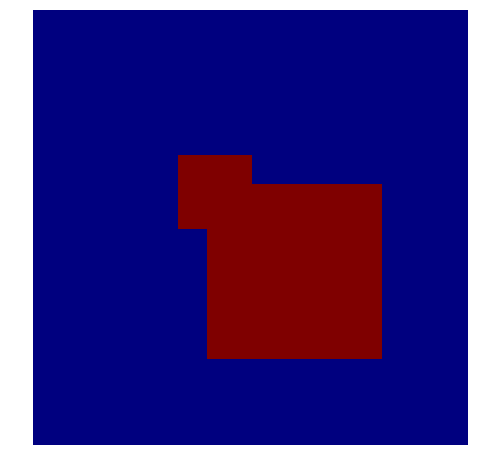

In [7]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img_loc)
plt.figure(); plt.axis('off')
plt.imshow(I)
plt.show()

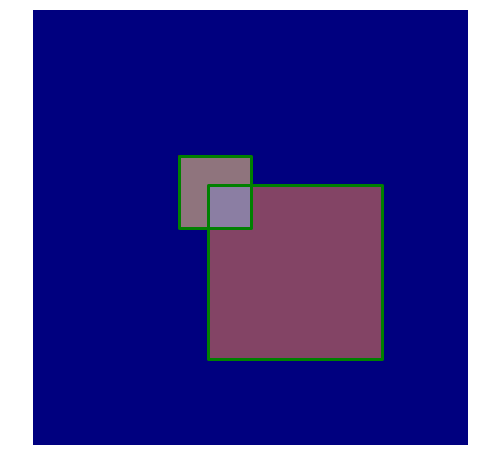

In [8]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

coco.showAnns(anns)



In [9]:
anns = coco.loadAnns(annIds)
anns

[{'area': 90000,
  'bbox': [100, 100, 50, 50],
  'category_id': 1,
  'id': 1,
  'image_id': 1,
  'iscrowd': 0,
  'segmentation': [[100, 100, 100, 150, 150, 150, 150, 100]]},
 {'area': 90000,
  'bbox': [120, 120, 120, 120],
  'category_id': 1,
  'id': 2,
  'image_id': 1,
  'iscrowd': 0,
  'segmentation': [[120, 120, 120, 240, 240, 240, 240, 120]]}]

In [10]:
anns = coco.loadAnns(annIds)
ann = anns[0]
seg = ann['segmentation']
annIds

[1, 2]